# Treinamento de Rede Neural

Esta implementação tem como objetivo criar o treinamento de uma rede multilayer perceptron

In [23]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
import seaborn as sns

In [24]:
pd.set_option("display.max_columns", 100) # quantidade de colunas mostradas
pd.set_option('float_format', '{:f}'.format)
pd.set_option('display.max_colwidth', 100)

## 1. Carga dos dados <a class="anchor" id="first-bullet"></a>

In [25]:
cancer = load_breast_cancer()

In [26]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = pd.Series(cancer.target)

In [27]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.990000,10.380000,122.800000,1001.000000,0.118400,0.277600,0.300100,0.147100,0.241900,0.078710,1.095000,0.905300,8.589000,153.400000,0.006399,0.049040,0.053730,0.015870,0.030030,0.006193,25.380000,17.330000,184.600000,2019.000000,0.162200,0.665600,0.711900,0.265400,0.460100,0.118900,0
1,20.570000,17.770000,132.900000,1326.000000,0.084740,0.078640,0.086900,0.070170,0.181200,0.056670,0.543500,0.733900,3.398000,74.080000,0.005225,0.013080,0.018600,0.013400,0.013890,0.003532,24.990000,23.410000,158.800000,1956.000000,0.123800,0.186600,0.241600,0.186000,0.275000,0.089020,0
2,19.690000,21.250000,130.000000,1203.000000,0.109600,0.159900,0.197400,0.127900,0.206900,0.059990,0.745600,0.786900,4.585000,94.030000,0.006150,0.040060,0.038320,0.020580,0.022500,0.004571,23.570000,25.530000,152.500000,1709.000000,0.144400,0.424500,0.450400,0.243000,0.361300,0.087580,0
3,11.420000,20.380000,77.580000,386.100000,0.142500,0.283900,0.241400,0.105200,0.259700,0.097440,0.495600,1.156000,3.445000,27.230000,0.009110,0.074580,0.056610,0.018670,0.059630,0.009208,14.910000,26.500000,98.870000,567.700000,0.209800,0.866300,0.686900,0.257500,0.663800,0.173000,0
4,20.290000,14.340000,135.100000,1297.000000,0.100300,0.132800,0.198000,0.104300,0.180900,0.058830,0.757200,0.781300,5.438000,94.440000,0.011490,0.024610,0.056880,0.018850,0.017560,0.005115,22.540000,16.670000,152.200000,1575.000000,0.137400,0.205000,0.400000,0.162500,0.236400,0.076780,0


In [28]:
df[df['target']==1] # pessoas com cancer de mama

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
19,13.540000,14.360000,87.460000,566.300000,0.097790,0.081290,0.066640,0.047810,0.188500,0.057660,0.269900,0.788600,2.058000,23.560000,0.008462,0.014600,0.023870,0.013150,0.019800,0.002300,15.110000,19.260000,99.700000,711.200000,0.144000,0.177300,0.239000,0.128800,0.297700,0.072590,1
20,13.080000,15.710000,85.630000,520.000000,0.107500,0.127000,0.045680,0.031100,0.196700,0.068110,0.185200,0.747700,1.383000,14.670000,0.004097,0.018980,0.016980,0.006490,0.016780,0.002425,14.500000,20.490000,96.090000,630.500000,0.131200,0.277600,0.189000,0.072830,0.318400,0.081830,1
21,9.504000,12.440000,60.340000,273.900000,0.102400,0.064920,0.029560,0.020760,0.181500,0.069050,0.277300,0.976800,1.909000,15.700000,0.009606,0.014320,0.019850,0.014210,0.020270,0.002968,10.230000,15.660000,65.130000,314.900000,0.132400,0.114800,0.088670,0.062270,0.245000,0.077730,1
37,13.030000,18.420000,82.610000,523.800000,0.089830,0.037660,0.025620,0.029230,0.146700,0.058630,0.183900,2.342000,1.170000,14.160000,0.004352,0.004899,0.013430,0.011640,0.026710,0.001777,13.300000,22.810000,84.460000,545.900000,0.097010,0.046190,0.048330,0.050130,0.198700,0.061690,1
46,8.196000,16.840000,51.710000,201.900000,0.086000,0.059430,0.015880,0.005917,0.176900,0.065030,0.156300,0.956700,1.094000,8.205000,0.008968,0.016460,0.015880,0.005917,0.025740,0.002582,8.964000,21.960000,57.260000,242.200000,0.129700,0.135700,0.068800,0.025640,0.310500,0.074090,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,14.590000,22.680000,96.390000,657.100000,0.084730,0.133000,0.102900,0.037360,0.145400,0.061470,0.225400,1.108000,2.224000,19.540000,0.004242,0.046390,0.065780,0.016060,0.016380,0.004406,15.480000,27.270000,105.900000,733.500000,0.102600,0.317100,0.366200,0.110500,0.225800,0.080040,1
559,11.510000,23.930000,74.520000,403.500000,0.092610,0.102100,0.111200,0.041050,0.138800,0.065700,0.238800,2.904000,1.936000,16.970000,0.008200,0.029820,0.057380,0.012670,0.014880,0.004738,12.480000,37.160000,82.280000,474.200000,0.129800,0.251700,0.363000,0.096530,0.211200,0.087320,1
560,14.050000,27.150000,91.380000,600.400000,0.099290,0.112600,0.044620,0.043040,0.153700,0.061710,0.364500,1.492000,2.888000,29.840000,0.007256,0.026780,0.020710,0.016260,0.020800,0.005304,15.300000,33.170000,100.200000,706.700000,0.124100,0.226400,0.132600,0.104800,0.225000,0.083210,1
561,11.200000,29.370000,70.670000,386.000000,0.074490,0.035580,0.000000,0.000000,0.106000,0.055020,0.314100,3.896000,2.041000,22.810000,0.007594,0.008878,0.000000,0.000000,0.019890,0.001773,11.920000,38.300000,75.190000,439.600000,0.092670,0.054940,0.000000,0.000000,0.156600,0.059050,1


## 2. Análise dos dados <a class="anchor" id="second-bullet"></a>

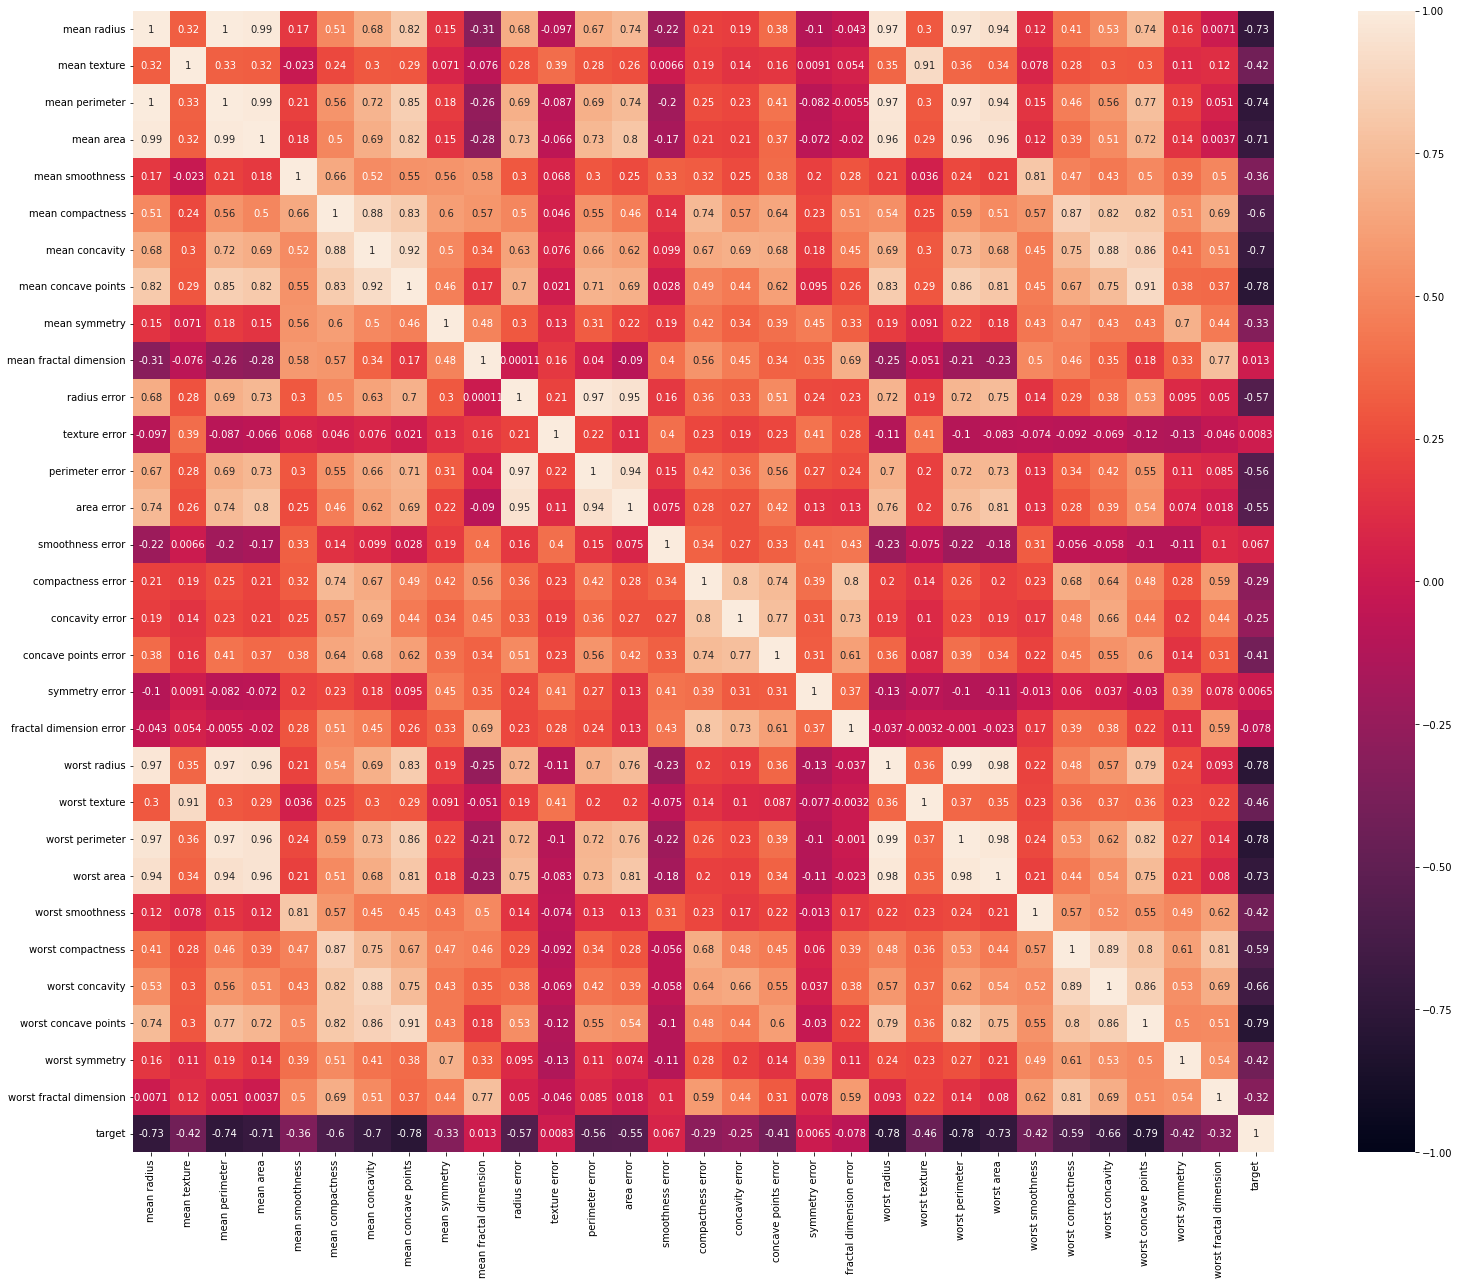

In [29]:
corrmat = df.corr() # ver correlação entre todas as colunas (correlação de pearson)
fig = plt.figure(figsize = (30,21))
sns.heatmap(corrmat,vmax = 1,square = True,annot = True,vmin = -1) # plotagem com heatmat do seaborn
plt.show()

In [30]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


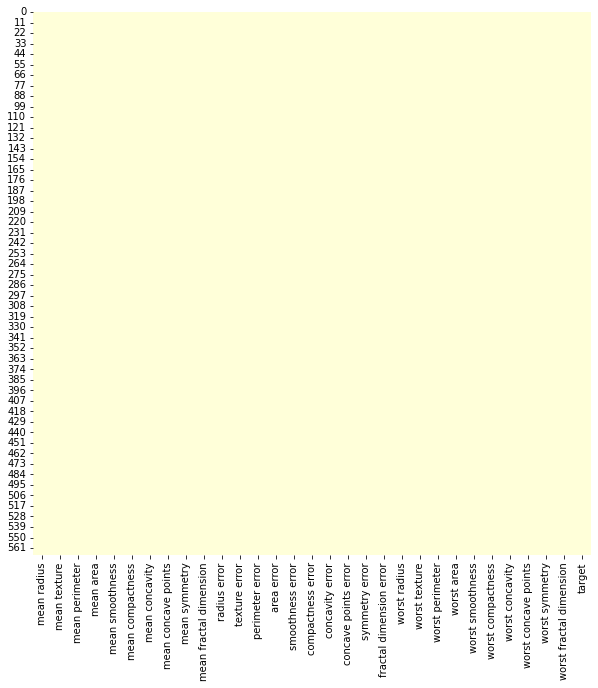

In [38]:
# para plotar gráfico
%matplotlib inline 
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),cbar=False,cmap='YlGnBu') # plotando os dados nulos do dataframe (não há dados nulos)
plt.ioff()

In [39]:
print(len(df)) # tamanho do dataframe em linhas

569


In [40]:
df['target'].value_counts() # contando os valores da coluna target do dataframe

1    357
0    212
Name: target, dtype: int64

<AxesSubplot:ylabel='target'>

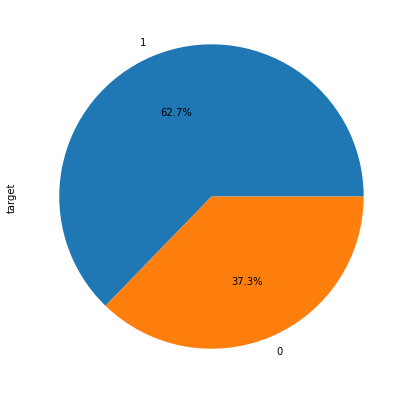

In [41]:
df['target'].value_counts().plot.pie(autopct="%1.1f%%",figsize=(10,7))

In [42]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [43]:
labels = df['target'].values # Salva o label para posterior comparação
del df['target'] # Remove a coluna vamos prever
feature_names = df.columns.values
features = df.values

## 3. Separando em dados de treino e teste <a class="anchor" id="3rd-bullet"></a>

In [44]:
# Dividir nossos dados
train, test, train_labels, test_labels = train_test_split(features, labels, test_size=0.10, random_state=42)

In [45]:
Sequential = tf.keras.models.Sequential
Activation = tf.keras.layers.Activation
Dense = tf.keras.layers.Dense



model = Sequential([
    Dense(100, input_shape=(train.shape[1],)),
    Activation('tanh'),
    Dense(300, input_shape=(train.shape[1],)),
    Activation('tanh'),
    Dense(500, input_shape=(train.shape[1],)),
    Activation('tanh'),
    Dense((2)),
    Activation('sigmoid'),
])



model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               3100      
_________________________________________________________________
activation_12 (Activation)   (None, 100)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 300)               30300     
_________________________________________________________________
activation_13 (Activation)   (None, 300)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 500)               150500    
_________________________________________________________________
activation_14 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 2)                

In [46]:
hist = model.fit(train, train_labels, epochs=50, batch_size=20)

Epoch 1/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4761 - accuracy: 0.8086
Epoch 2/50
26/26 [==============================] - 0s 2ms/step - loss: 0.3191 - accuracy: 0.8730
Epoch 3/50
26/26 [==============================] - 0s 2ms/step - loss: 0.3779 - accuracy: 0.8672
Epoch 4/50
26/26 [==============================] - 0s 2ms/step - loss: 0.2732 - accuracy: 0.8984
Epoch 5/50
26/26 [==============================] - 0s 2ms/step - loss: 0.3050 - accuracy: 0.8711
Epoch 6/50
26/26 [==============================] - 0s 2ms/step - loss: 0.2755 - accuracy: 0.8984
Epoch 7/50
26/26 [==============================] - 0s 2ms/step - loss: 0.2536 - accuracy: 0.9062
Epoch 8/50
26/26 [==============================] - 0s 2ms/step - loss: 0.2429 - accuracy: 0.9004
Epoch 9/50
26/26 [==============================] - 0s 2ms/step - loss: 0.2706 - accuracy: 0.8730
Epoch 10/50
26/26 [==============================] - 0s 2ms/step - loss: 0.3251 - accuracy: 0.8750
Epoch 11/50
26/26 [

### Resultados do treinamento

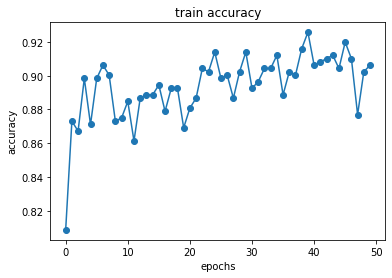

In [47]:
acc = hist.history['accuracy']
plt.plot(acc)
plt.scatter(range(len(acc)),acc)
plt.title("train accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

## 4. Classificando novos dados <a class="anchor" id="4th-bullet"></a>

In [48]:
pred = [model.predict(np.expand_dims(tensor, axis=0)) for tensor in test]
pred_score = [p[0] for p in pred]

In [59]:
threshold = 0.5 # "nota de corte" para definir se é cancer ou não

In [50]:
y_pred_threshold = [1*(p[0] > threshold) for p in pred]

In [51]:
df_result = pd.DataFrame(y_pred_threshold,columns=['first','second'])
y_pred = df_result['second'].values

In [52]:
# Avaliar a precisão
print(accuracy_score(test_labels, y_pred))

0.9473684210526315


In [53]:
test_df = pd.DataFrame(test,columns=['mean radius', 'mean texture', 'mean perimeter', 'mean area',
    'mean smoothness', 'mean compactness', 'mean concavity',
    'mean concave points', 'mean symmetry', 'mean fractal dimension',
    'radius error', 'texture error', 'perimeter error', 'area error',
    'smoothness error', 'compactness error', 'concavity error',
    'concave points error', 'symmetry error', 'fractal dimension error',
    'worst radius', 'worst texture', 'worst perimeter', 'worst area',
    'worst smoothness', 'worst compactness', 'worst concavity',
    'worst concave points', 'worst symmetry', 'worst fractal dimension'] )

In [54]:
test_df['PREDICAO'] = y_pred

In [55]:
len(test_df)

57

In [57]:
# Avaliar a precisão
print(accuracy_score(test_labels, y_pred))

0.9473684210526315


In [58]:
test_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,PREDICAO
0,12.470000,18.600000,81.090000,481.900000,0.099650,0.105800,0.080050,0.038210,0.192500,0.063730,0.396100,1.044000,2.497000,30.290000,0.006953,0.019110,0.027010,0.010370,0.017820,0.003586,14.970000,24.640000,96.050000,677.900000,0.142600,0.237800,0.267100,0.101500,0.301400,0.087500,0
1,18.940000,21.310000,123.600000,1130.000000,0.090090,0.102900,0.108000,0.079510,0.158200,0.054610,0.788800,0.797500,5.486000,96.050000,0.004444,0.016520,0.022690,0.013700,0.013860,0.001698,24.860000,26.580000,165.900000,1866.000000,0.119300,0.233600,0.268700,0.178900,0.255100,0.065890,0
2,15.460000,19.480000,101.700000,748.900000,0.109200,0.122300,0.146600,0.080870,0.193100,0.057960,0.474300,0.785900,3.094000,48.310000,0.006240,0.014840,0.028130,0.010930,0.013970,0.002461,19.260000,26.000000,124.900000,1156.000000,0.154600,0.239400,0.379100,0.151400,0.283700,0.080190,0
3,12.400000,17.680000,81.470000,467.800000,0.105400,0.131600,0.077410,0.027990,0.181100,0.071020,0.176700,1.460000,2.204000,15.430000,0.010000,0.032950,0.048610,0.011670,0.021870,0.006005,12.880000,22.910000,89.610000,515.800000,0.145000,0.262900,0.240300,0.073700,0.255600,0.093590,1
4,11.540000,14.440000,74.650000,402.900000,0.099840,0.112000,0.067370,0.025940,0.181800,0.067820,0.278400,1.768000,1.628000,20.860000,0.012150,0.041120,0.055530,0.014940,0.018400,0.005512,12.260000,19.680000,78.780000,457.800000,0.134500,0.211800,0.179700,0.069180,0.232900,0.081340,1


In [61]:
# Inicializar nosso classificador
gnb = GaussianNB()

# Treinar nosso classificador
model = gnb.fit(train, train_labels)

# Fazer previsões
preds = gnb.predict(test)
print(preds)

# Avaliar a precisão
print(accuracy_score(test_labels, preds))

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1]
0.9824561403508771


In [ ]:
# Treinar: https://www.kaggle.com/c/titanic